In [2]:
#@title ### Run the following cell to download the necessary files for this lesson { display-mode: "form" } 
#@markdown Don't worry about what's in this collapsed cell

!pip install -q statsmodels
!pip install -q scipy
print('Downloading nulled_df.csv...')
!wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/ec957285-bf30-4e5c-942b-16d3983023f9/nulled_df.csv -q -O nulled_df.csv


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
import requests

def download_file(url, filename):
    print(f'Downloading {filename}...')
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f'{filename} downloaded successfully.')
    else:
        print(f'Failed to download {filename}. Status code: {response.status_code}')

url = 'https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/ec957285-bf30-4e5c-942b-16d3983023f9/nulled_df.csv'
filename = 'null_df.csv'
download_file(url, filename)


null_df.csv downloaded successfully.


In [8]:
import pandas as pd
df = pd.read_csv('null_df.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,NaN,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,NaN,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,NaN,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,NaN,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,NaN,1.133333,845.0,2.560606,39.48,NaN,0.781
20636,2.5568,18.0,6.114035,NaN,356.0,3.122807,39.49,NaN,0.771
20637,NaN,17.0,5.205543,1.120092,1007.0,2.325635,39.43,NaN,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,NaN,0.847


In [9]:
df.isnull().sum()

MedInc         1032
HouseAge         21
AveRooms       7224
AveBedrms      2064
Population     1032
AveOccup         21
Latitude        206
Longitude      8050
MedHouseVal       0
dtype: int64

In [11]:
print('percentage of null values in each column:')
df.isnull().sum()/len(df)

percentage of null values in each column:


MedInc         0.050000
HouseAge       0.001017
AveRooms       0.350000
AveBedrms      0.100000
Population     0.050000
AveOccup       0.001017
Latitude       0.009981
Longitude      0.390019
MedHouseVal    0.000000
dtype: float64

In [12]:
import pandas as pd
from scipy.stats import normaltest

# Assume df is your DataFrame and 'column' is the column you want to test
data = df['Population']


# D’Agostino’s K^2 Test
stat, p = normaltest(data, nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=20941.048, p=0.000


<Axes: >

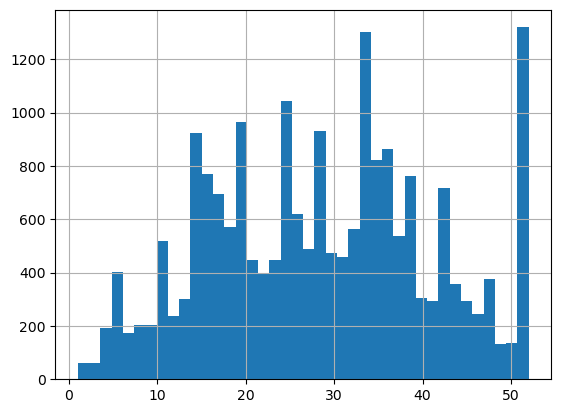

In [13]:
df['HouseAge'].hist(bins=40)

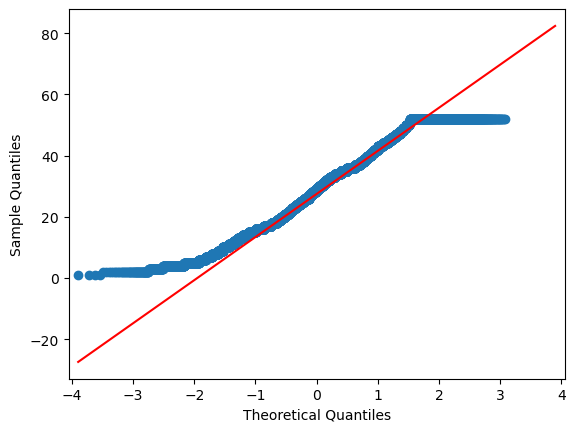

In [14]:
# q-q plot of HouseAge:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


# scaleHouseAge: 


qq_plot = qqplot(df['HouseAge'] , scale=1 ,line='q')
pyplot.show()

In [15]:
print(f'The median of HouseAge is {df["HouseAge"].median()}')
print(f'The mean of HouseAge is {df["HouseAge"].mean()}')

The median of HouseAge is 29.0
The mean of HouseAge is 28.638488772491392


In [16]:
# impute HouseAge with median:
df['HouseAge'] = df['HouseAge'].fillna(df['HouseAge'].median())